# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 6</span>


### Il modello di Ising
Il modello di Ising è un modello di un magnete. Il presupposto essenziale è che il magnetismo di un materiale è costituito dai momenti dipolari magnetici combinati di molti spin atomici all'interno del materiale. Il modello postula un reticolo (che può avere qualsiasi geometria) con un dipolo magnetico o spin in ciascun sito.
Nel modello di Ising questi spin assumono la forma più semplice possibile, costituita da variabili scalari $s_i$​ che possono assumere solo due valori $\pm 1$, rappresentando dipoli di modulo uno puntati verso l'alto o verso il basso.
Ci sono tre diversi tipi principali di magnetismo: diamagnetismo, paramagnetismo e ferromagnetismo.
Noi modelizzeremo un modello di Ising in $1D$.
L'hamiltoniana di un sistema di $N$ spin con l'interazione data dai primi vicini, con $\mu_B=1$ e $k_B=1$ è la seguente: $$
H = 
-J\sum_{i=1}^N s_i s_{i+1}
-\frac{h}{2}\sum_{i=1}^N (s_i + s_{i+1}) 
$$
dove $\{ s_i \}_{i=1,N}$ sono le variabili di spin, che prendono i valori $\{-1;1\}$, $J>0$ (modello ferromagnetico), e con l'assunzione $s_{N+1} = s_{1}$. La funzione di partizione per $N$ spin, $Z$, può essere calcolata e vale:$$
Z=\sum_{\{ s_i \}} \exp \left( -\beta H\right) = \lambda_1^N + \lambda_2^N
$$
dove $\lambda_{1,2} = 
e^{\beta J} 
\cosh (\beta h) \pm \left[ e^{2\beta J} \cosh^2 (\beta h) - 2\sinh (2\beta J) \right]^{1/2}$, 
e dove $\beta=\frac{1}{k_b T} = \frac{1}{T}$. Una volta che la funzione di partizione è stata calcolata, l'energia libera di Helmoltz si ottiene come $A = -k_B T \ln Z$. Tutte le quantità termodinamiche di interesse possono essere dedotti da $A$, o equivalentemente da $Z$.

### Exercise 06.1

In questo esercizio implementeremo l'algoritmo di sampling di Gibbs per campionare il seguente peso di Boltzmann:  $p(\{ s_i \}) = \exp(-\beta H)/Z$. Calcoleremo poi l'energia interna, la magnetizzazione, il calore specifico e la suscettività sia col Gibbs che col Metropolis. Useremo come sempre la tencica del data blocking.

### Energia interna $U(N,T)$
L'energia interna per particella è calcolata nel seguente modo: $$\frac{U(N,T)}{N} = \frac{\langle H \rangle}{N}
= \frac{1}{N} \sum_{\{ s_i \}} H \frac{\exp \left( -\beta H\right)}{Z}$$
La cui soluzione analitica è: $$\frac{U(N,T)}{N}=-\frac{1}{N}\frac{\partial \ln Z}{\partial \beta} \underset{h=0}= -J \tanh (\beta J) \Biggl( \frac{1 + \tanh^{N-2} (\beta J)}{1+\tanh^N (\beta J)} \Biggl)$$

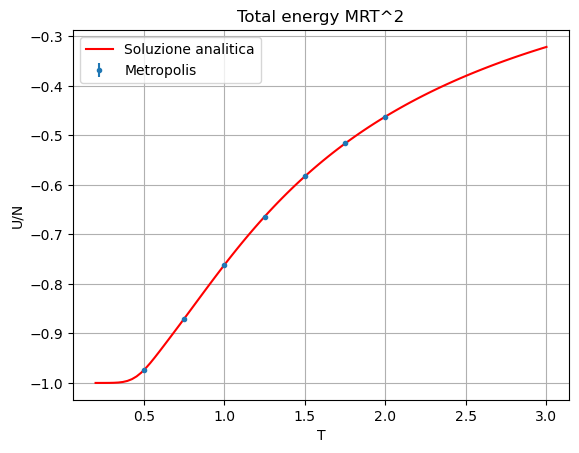

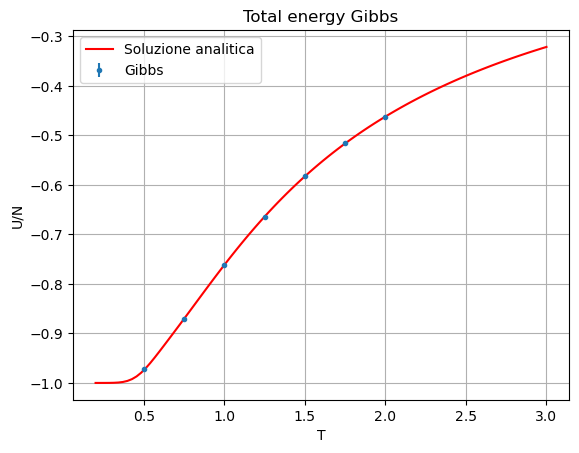

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Lettura dei dati dal file total_energy_mrt2.dat
x_total_energy = []
y_total_energy = []
error_total_energy = []
with open("./nsl_simulator/NSL_SIMULATOR/OUTPUT/total_energy_mrt2.dat", 'r') as file:
    for line in file:
        data = line.strip().split()
        x_total_energy.append(float(data[0]))
        y_total_energy.append(float(data[1]))
        error_total_energy.append(float(data[2]))

x_total_energy_g = []
y_total_energy_g = []
error_total_energy_g = []
with open("./nsl_simulator/NSL_SIMULATOR/OUTPUT/total_energy_gibbs.dat", 'r') as file:
    for line in file:
        data = line.strip().split()
        x_total_energy_g.append(float(data[0]))
        y_total_energy_g.append(float(data[1]))
        error_total_energy_g.append(float(data[2]))


# Grafico dell'Ising 1D
points = 100
T = np.linspace(0.2, 3.0, num=points)
beta = 1 / T
J = 1.0
Ns = 50
th = np.tanh(J / T)
thN = th**Ns
ch = 1 / th
e = -J * (th + ch * thN) / (1 + thN)

# Creazione del grafico
plt.errorbar(x_total_energy, y_total_energy, yerr=error_total_energy, fmt='o', markersize=3, label='Metropolis')
plt.plot(T, e, 'r-', label='Soluzione analitica')

plt.xlabel('T')
plt.ylabel('U/N')
plt.title('Total energy MRT^2')
plt.legend()
plt.grid(True)
plt.show()

plt.errorbar(x_total_energy_g, y_total_energy_g, yerr=error_total_energy_g, fmt='o', markersize=3, label='Gibbs')
plt.plot(T, e, 'r-', label='Soluzione analitica')

plt.xlabel('T')
plt.ylabel('U/N')
plt.title('Total energy Gibbs')
plt.legend()
plt.grid(True)
plt.show()

### Calore specifico $C(N,T)$
La capacità termica è calcolata nel seguente modo: $$C(N,T) = \frac{\partial U(N,T)}{\partial T}
= \frac{\partial \beta}{\partial T}\frac{\partial U}{\partial \beta}
= k_B\beta^2 \left(\langle H^2 \rangle -\langle H \rangle^2 \right)$$
La cui soluzione analitica per particella è: 
$$\frac{C(N,T)}{N} = \frac{1}{N}\frac{\partial U(N,T)}{\partial T} \underset{h=0}=  k_B (\beta J)^2 \left\{ 1+\tanh^N (\beta J)+(N-1)\tanh^2 (\beta J)+(N-1)\frac{\tanh^{N-2} (\beta J)}{1+\tanh^N (\beta J)}
- N \left[ \frac{\tanh (\beta J) + \tanh^{N-1} (\beta J)}{1+\tanh^N (\beta J)} \right]^2 \right\}$$

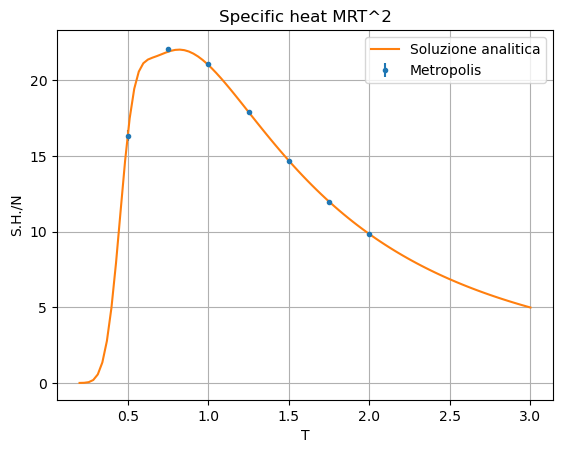

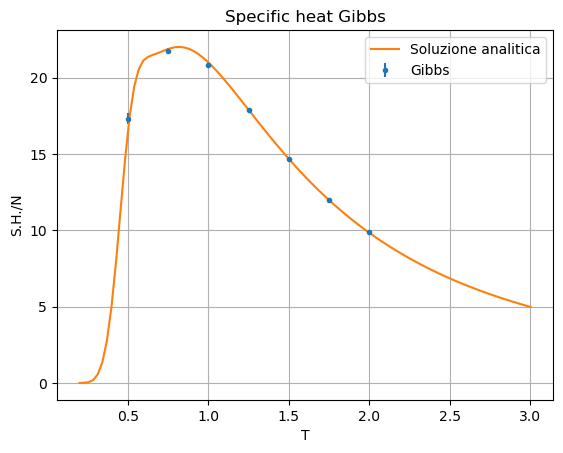

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Lettura dei dati dal file total_energy_mrt2.dat
x_heat = []
y_heat = []
error_heat = []
with open("./nsl_simulator/NSL_SIMULATOR/OUTPUT/specific_heat_mrt2.dat", 'r') as file:
    for line in file:
        data = line.strip().split()
        x_heat.append(float(data[0]))
        y_heat.append(float(data[1]))
        error_heat.append(float(data[2]))

x_heat_g = []
y_heat_g = []
error_heat_g = []
with open("./nsl_simulator/NSL_SIMULATOR/OUTPUT/specific_heat_gibbs.dat", 'r') as file:
    for line in file:
        data = line.strip().split()
        x_heat_g.append(float(data[0]))
        y_heat_g.append(float(data[1]))
        error_heat_g.append(float(data[2]))

# Grafico dell'Ising 1D
heat=(((beta*J)**2)*(((1+thN+(Ns-1)*(th**2)+(Ns-1)*(ch**2)*thN)/(1+thN))-Ns*((th+ch*thN)/(1+thN))**2))*50

# Creazione del grafico
plt.errorbar(x_heat, y_heat, yerr=error_heat, fmt='o', markersize=3, label='Metropolis')
plt.plot(T, heat, label='Soluzione analitica')

plt.xlabel('T')
plt.ylabel('S.H./N')
plt.title('Specific heat MRT^2')
plt.legend()
plt.grid(True)
plt.show()

# Creazione del grafico
plt.errorbar(x_heat_g, y_heat_g, yerr=error_heat_g, fmt='o', markersize=3, label='Gibbs')
plt.plot(T, heat, label='Soluzione analitica')

plt.xlabel('T')
plt.ylabel('S.H./N')
plt.title('Specific heat Gibbs')
plt.legend()
plt.grid(True)
plt.show()

### Magnetizzazione $M(N,T,h)$
La magnetizzazione è calcolata nel seguente modo: $$
M(N,T,h) = -\frac{\partial A}{\partial h} = k_B T \frac{\partial \ln Z}{\partial h} =
\frac{1}{\beta} \frac{1}{Z}\frac{\partial}{\partial h}\sum_{\{ s_i \}} \exp \left( -\beta H\right) = \sum_{\{ s_i \}} \left[ \sum_{i=1,N}s_i\right] \frac{\exp \left( -\beta H\right)}{Z} = \left\langle \sum_{i=1,N}s_i \right\rangle
$$
La cui soluzione analitica per particella è: $$
\frac{M(N,T,h)}{N}=\frac{e^{\beta J}\; \sinh(\beta h)}{Z} \; \Bigl[\lambda_1^{N-1}\cdot \Bigl(1+\frac{e^{\beta J}\; \cosh(\beta h)}{\sqrt{e^{2\beta J} \cosh^2 (\beta h) - 2\sinh (2\beta J)}}\Bigr) + \lambda_2^{N-1}\cdot \Bigl(1-\frac{e^{\beta J}\; \cosh(\beta h)}{\sqrt{e^{2\beta J} \cosh^2 (\beta h) - 2\sinh (2\beta J)}}\Bigr)\Bigr]
$$
Questo viene fatto con $h=0.02$, altrimenti la magnetizzazione sarebbe nulla, poichè in una dimensione non possiamo avere una transizione di fase ferromagnetica in assenza di un campo magnetico esterno.

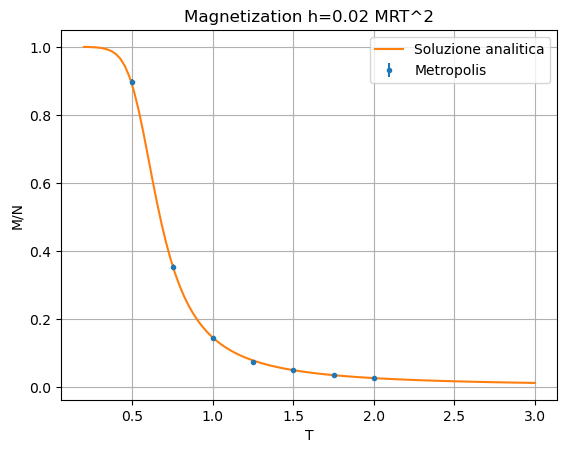

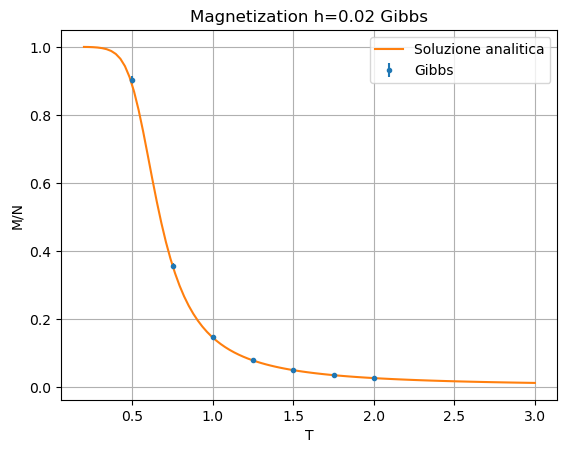

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Lettura dei dati dal file total_energy_mrt2.dat
x_magn = []
y_magn = []
error_magn = []
with open("./nsl_simulator/NSL_SIMULATOR/OUTPUT/magnetization_mrt2.dat", 'r') as file:
    for line in file:
        data = line.strip().split()
        x_magn.append(float(data[0]))
        y_magn.append(float(data[1]))
        error_magn.append(float(data[2]))

x_magn_g = []
y_magn_g = []
error_magn_g = []
with open("./nsl_simulator/NSL_SIMULATOR/OUTPUT/magnetization_gibbs.dat", 'r') as file:
    for line in file:
        data = line.strip().split()
        x_magn_g.append(float(data[0]))
        y_magn_g.append(float(data[1]))
        error_magn_g.append(float(data[2]))


# Grafico dell'Ising 1D
h=0.02 #external field
b = 1/T

l1 = np.exp(b*J)*np.cosh(b*h)+np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
l2 = np.exp(b*J)*np.cosh(b*h)-np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
Z = l1**Ns + l2**Ns
M = (np.exp(b*J)*np.sinh(b*h)*((l1**(Ns-1))*(1+np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))) 
        + (l2**(Ns-1))*(1-np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J)))))/(Z)

# Creazione del grafico
plt.errorbar(x_magn, y_magn, yerr=error_magn, fmt='o', markersize=3, label='Metropolis')
plt.plot(T, M, label='Soluzione analitica')

plt.xlabel('T')
plt.ylabel('M/N')
plt.title('Magnetization h=0.02 MRT^2')
plt.legend()
plt.grid(True)
plt.show()

# Creazione del grafico

plt.errorbar(x_magn_g, y_magn_g, yerr=error_magn_g, fmt='o', markersize=3, label='Gibbs')
plt.plot(T, M, label='Soluzione analitica')

plt.xlabel('T')
plt.ylabel('M/N')
plt.title('Magnetization h=0.02 Gibbs')
plt.legend()
plt.grid(True)
plt.show()

### Suscettività $\chi(N,T)$
La suscettività è calcolata nel seguente modo: $$\chi(N,T)=\beta \left[ \left\langle \left( \sum_{i=1,N}s_i \right)^2 \right\rangle \right]$$
La cui soluzione analitica è: $$\chi(N,T)=\beta e^{2\beta J} \Biggl( \frac{1-\tanh^N (\beta J)}{1+\tanh^N (\beta J)} \Biggl)$$

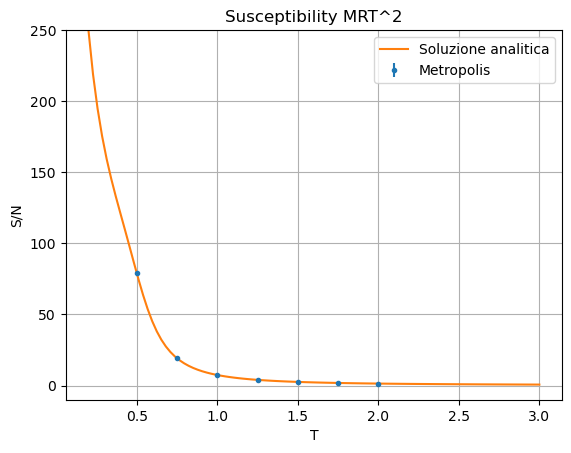

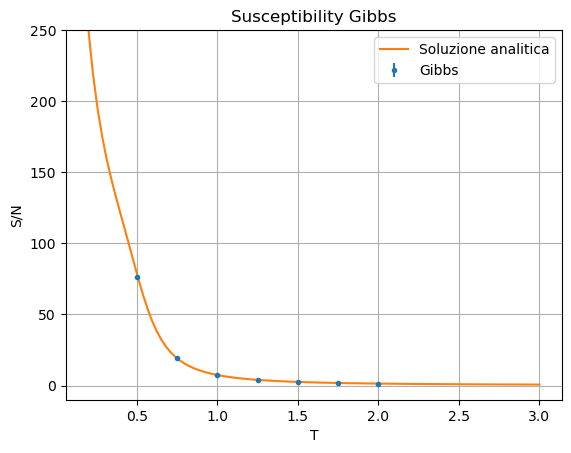

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Lettura dei dati dal file total_energy_mrt2.dat
x_susc = []
y_susc = []
error_susc = []
with open("./nsl_simulator/NSL_SIMULATOR/OUTPUT/susceptibility_mrt2.dat", 'r') as file:
    for line in file:
        data = line.strip().split()
        x_susc.append(float(data[0]))
        y_susc.append(float(data[1]))
        error_susc.append(float(data[2]))


x_susc_g = []
y_susc_g = []
error_susc_g = []
with open("./nsl_simulator/NSL_SIMULATOR/OUTPUT/susceptibility_gibbs.dat", 'r') as file:
    for line in file:
        data = line.strip().split()
        x_susc_g.append(float(data[0]))
        y_susc_g.append(float(data[1]))
        error_susc_g.append(float(data[2]))


# Grafico dell'Ising 1D
X = beta*np.exp(2*beta*J)*(1-thN)/(1+thN)

# Creazione del grafico
plt.errorbar(x_susc, y_susc, yerr=error_susc, fmt='o', markersize=3, label='Metropolis')
plt.plot(T, X, label='Soluzione analitica')

plt.xlabel('T')
plt.ylabel('S/N')
plt.ylim(-10,250)
plt.title('Susceptibility MRT^2')
plt.legend()
plt.grid(True)
plt.show()


plt.errorbar(x_susc_g, y_susc_g, yerr=error_susc_g, fmt='o', markersize=3, label='Gibbs')
plt.plot(T, X, label='Soluzione analitica')

plt.xlabel('T')
plt.ylabel('S/N')
plt.ylim(-10,250)
plt.title('Susceptibility Gibbs')
plt.legend()
plt.grid(True)
plt.show()